$$ a = Y^{T}X(X^{T}X)^{-1} $$
$$ \underset{1\times k}{\mathrm{a}} = [a_1 ... a_k] $$
$$ \underset{N\times k}{\mathrm{X}} $$
$$ \underset{N\times 1}{\mathrm{Y}} $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
class LinearModel:
    def __init__(self, method: str = "analitical"):
        self.fit_func = method
        self.params = None

    @property
    def fit_func(self):
        return self._fit_func

    @fit_func.setter
    def fit_func(self, method):
        if method not in ["analitical", "numerical"]:
            raise ValueError("Unknown method")
        if method == "analitical":
            self._fit_func = self.__fit_analitical
        else:
            self._fit_func = self.__fit_numerical

    def __fit_analitical(self, X: np.ndarray, Y: np.ndarray):
        X_ext = np.hstack((np.ones((X.shape[0], 1)), X))
        self.params = Y.T @ X_ext @ np.linalg.inv(X_ext.T @ X_ext)

    def __fit_numerical(self, X: np.ndarray, Y: np.ndarray):
        pass

    def fit(self, X, Y):
        self.fit_func(X, Y)

    def predict(self, X):
        X_ext = np.hstack((np.ones((X.shape[0], 1)), X)) # add bias
        Y_pred = X_ext @ self.params.T
        return Y_pred

    def plot(self, X, Y_pred, Y_true):
        plt.scatter(X, Y_true, label="True", color="red")
        plt.scatter(X, Y_pred, label="Predicted", marker="x", color="blue")
        plt.legend(["Predicted", "True"])
        plt.show()

    def __str__(self) -> str:
        data = f"Linear model with {self.fit_func.__name__.split('_')[-1]} method\n"
        if self.params is not None:
            data += f" and parameters {self.params}"
        else:
            data += " not fitted to fit use `fit` method "
        return data


(1, 2)
(20, 1) @ (1, 2)
(20, 2) @ (1, 2)


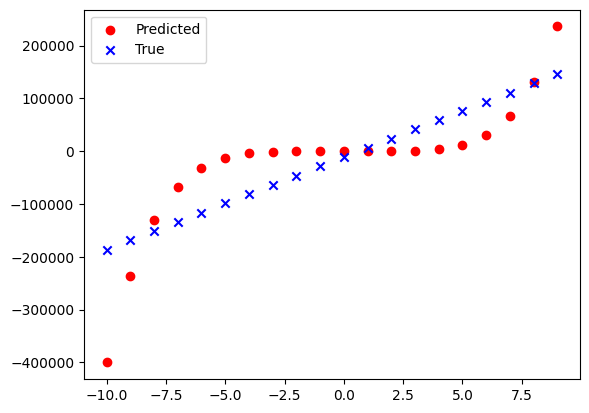

In [85]:
model = LinearModel("analitical")
X = range(-10, 10)
func = lambda x: 4 * x**5 + 3
Y = [func(x) for x in X]
X = np.array([X]).T
Y = np.array([Y]).T
model.fit(X, Y)
print(model.params.shape)
Y_pred =  model.predict(X)
model.plot(X, Y_pred, Y)